<a href="https://colab.research.google.com/github/orhanaydinn/sign_language_Project/blob/main/Sign_Language_Detection_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1 - Uploaded Dataset**

In [ ]:
!pip install -q gdown
import gdown

file_id = "1ls3KScpK6p4siMTtGAuNx6MqsN4wYv7y"
url = f"https://drive.google.com/uc?id={file_id}"
output = "SL_Numbers.zip"

gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From (original): https://drive.google.com/uc?id=1ls3KScpK6p4siMTtGAuNx6MqsN4wYv7y
From (redirected): https://drive.google.com/uc?id=1ls3KScpK6p4siMTtGAuNx6MqsN4wYv7y&confirm=t&uuid=7d7469dd-2b80-4f5e-8d4c-bb3c45b310a6
To: /content/SL_Numbers.zip
100%|██████████| 1.59G/1.59G [00:35<00:00, 44.6MB/s]


'SL_Numbers.zip'

SL_Numbers.zip file upload with google drive link.
```
zip_path = "/content/SL_Numbers.zip
extract_path = "/content/SL_Numbers"
```
**zip_path** represents the file path of the uploaded ZIP file.

**extract_path** defines the destination directory where the contents of the ZIP file will be extracted.

In [ ]:
import zipfile
import os

# File and directory paths to extract
zip_path = "/content/SL_Numbers.zip"
extract_path = "/content/SL_Numbers_datasets"

# Open zip file and extract
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset successfully extracted to:", extract_path)


Dataset successfully extracted to: /content/SL_Numbers_datasets


## 1.1 - Check Check Main Dataset File

Check the loaded datasets before data preparation process.

In [ ]:
for root, dirs, files in os.walk(extract_path):
    print(f"\n{root}")
    for d in dirs:
        print(f"├── {d}")
    for f in files[:5]:
        print(f"├── {f}")


/content/SL_Numbers_datasets
├── SL_Numbers_our
├── SL_Numbers_merged_aug
├── SL_Numbers
├── SL_Numbers_merged
├── best_model_vgg16.pt
├── best_model_cnn.pt
├── best_model_resnet50.pt
├── best_model_resnet50_finetuned.pt

/content/SL_Numbers_datasets/SL_Numbers_our
├── 2
├── 4
├── 0
├── 6
├── 3
├── 1
├── 5
├── 7
├── 8
├── 9

/content/SL_Numbers_datasets/SL_Numbers_our/2
├── IMG_6750.JPEG
├── IMG_6752.JPEG
├── IMG_5310.JPG
├── IMG_6751.JPEG
├── IMG_4101.JPG

/content/SL_Numbers_datasets/SL_Numbers_our/4
├── IMG_4163.JPG
├── IMG_5541.JPG
├── IMG_4237.JPG
├── IMG_1306.JPG
├── IMG_6664.JPEG

/content/SL_Numbers_datasets/SL_Numbers_our/0
├── IMG_6727.JPEG
├── IMG_5255.JPG
├── IMG_5796.JPG
├── IMG_4109.JPG
├── IMG_5756.JPG

/content/SL_Numbers_datasets/SL_Numbers_our/6
├── IMG_4430.JPG
├── IMG_5117.JPG
├── IMG_1124.JPG
├── IMG_6906.JPEG
├── IMG_5924.JPG

/content/SL_Numbers_datasets/SL_Numbers_our/3
├── IMG_4718.JPG
├── IMG_1172.JPG
├── IMG_6994.JPEG
├── IMG_4439.JPG
├── IMG_5953.JPG

/cont

## 1.2 - Check Images for All Classes

Check the loaded datasets image before data preparation process.

**` def show_random_images(dataset_dir, samples=3):`**
This function displays a random 3 sample images from each class.

**`img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)`**
cv2 library create BGR images default setting. This code convert BGR to RGB.



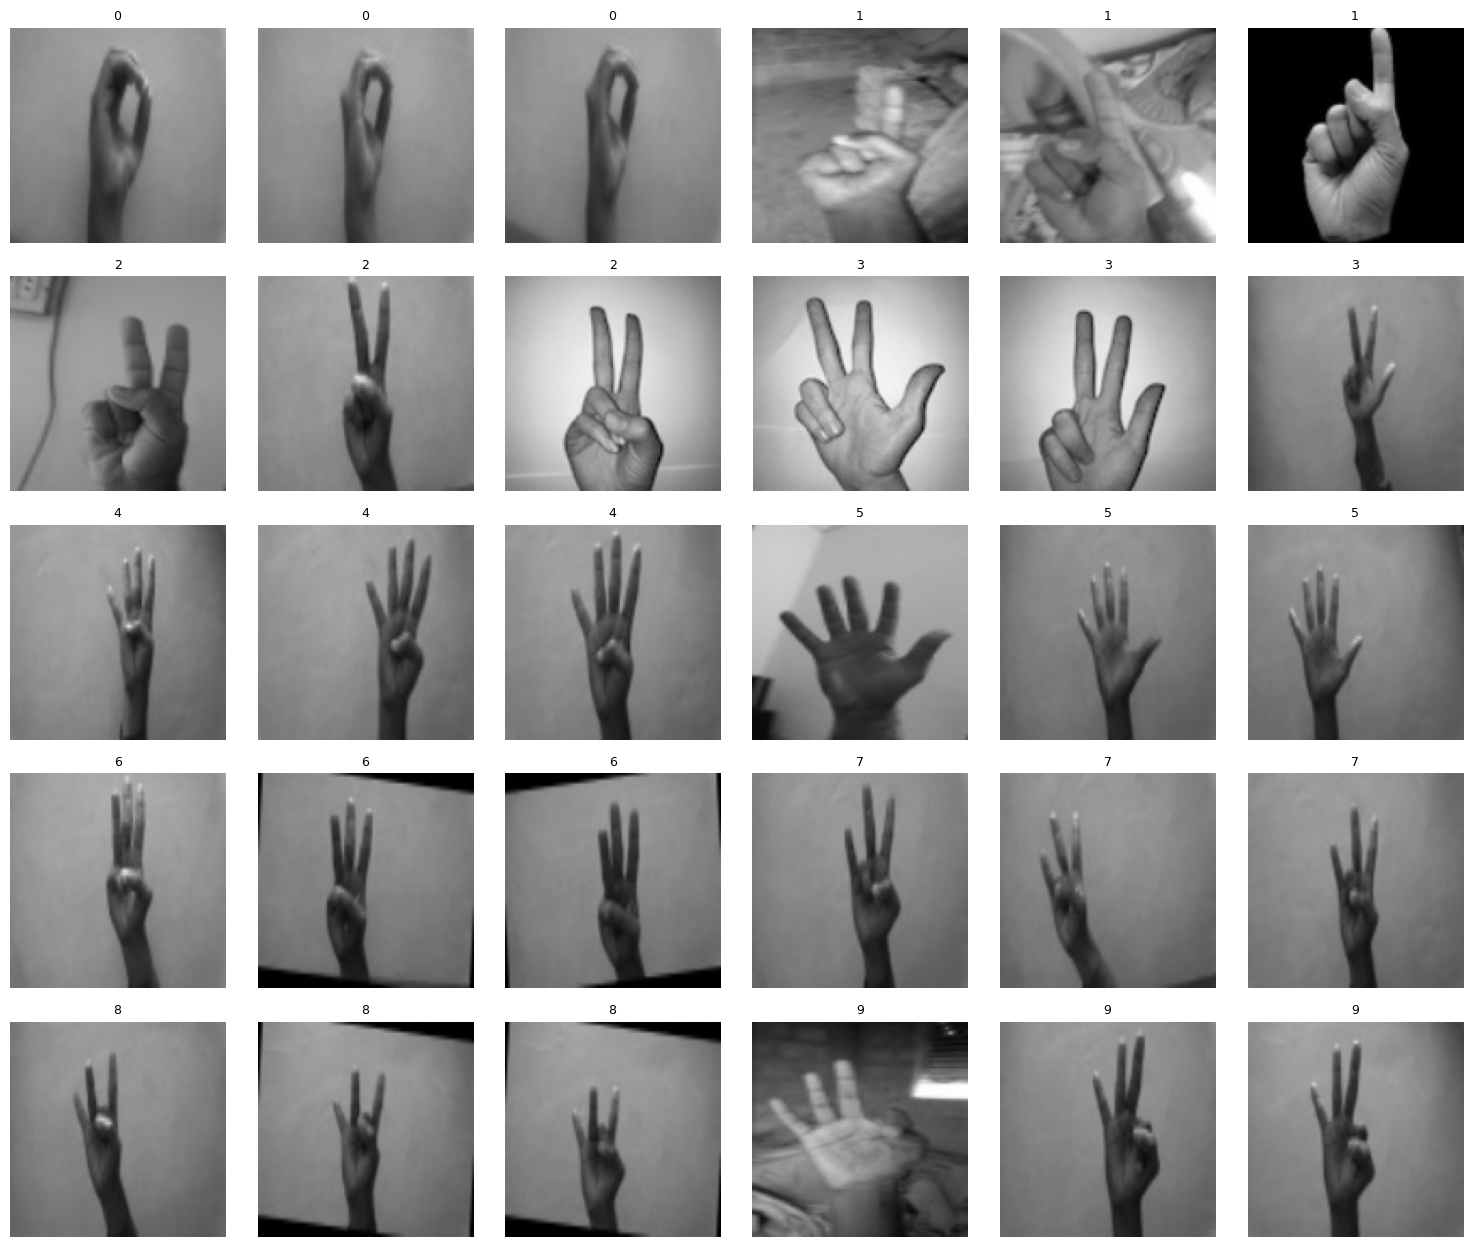

In [ ]:
import os
import cv2
import random
import matplotlib.pyplot as plt

IMG_SIZE = 128

def show_random_images(dataset_dir, samples=3):

    inner_dir = '/content/SL_Numbers_datasets/SL_Numbers'

    class_folders = [f for f in os.listdir(inner_dir) if os.path.isdir(os.path.join(inner_dir, f))]

    rows = len(class_folders)
    cols = 6
    plt.figure(figsize=(cols * 2.5, rows * 2.5))
    i = 1

    for label in sorted(class_folders):
        class_path = os.path.join(inner_dir, label)
        images = os.listdir(class_path)
        random.shuffle(images)

        for img_name in images[:samples]:
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)

            if img is None:
                continue

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

            plt.subplot(rows, cols, i)
            plt.imshow(img)
            plt.title(label, fontsize=9)
            plt.axis('off')
            i += 1

    plt.tight_layout()
    plt.show()


show_random_images("/content/SL_Numbers_datasets/SL_Numbers", samples=3)


## 1.3 - Check Main Dataset Count

The dataset size was controlled and created table and graph

   Class  Image Count
0   zero         1500
1    one         1500
2    two         1500
3  three         1500
4   four         1500
5   five         1500
6    six         1500
7  seven         1500
8  eight         1500
9   nine         1500

Total Image: 15000


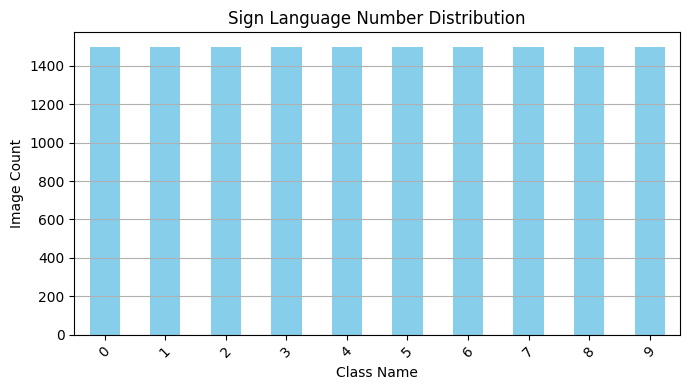

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_dir = "/content/SL_Numbers_datasets/SL_Numbers"


label_map = {
    "0": "zero", "1": "one", "2": "two", "3": "three", "4": "four",
    "5": "five", "6": "six", "7": "seven", "8": "eight", "9": "nine"
}

def count_images_in_folders(base_dir):
    class_counts = {}
    for class_name in sorted(os.listdir(base_dir)):
        class_path = os.path.join(base_dir, class_name)
        if os.path.isdir(class_path):
            image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            readable_name = label_map.get(class_name, class_name)
            class_counts[readable_name] = len(image_files)
    return class_counts

class_counts = count_images_in_folders(base_dir)

df = pd.DataFrame(list(class_counts.items()), columns=["Class", "Image Count"])
df = df.sort_values("Image Count", ascending=False)


total = df["Image Count"].sum()
print(df)
print(f"\nTotal Image: {total}")

df.plot(kind="bar", figsize=(7, 4), legend=False, color="skyblue")
plt.title("Sign Language Number Distribution")
plt.ylabel("Image Count")
plt.xlabel("Class Name")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# **2 - Sign Language Data Preparation & Preprocessing**

## 2.1 - Add Our Dataset

In this project, our models cannot detect images during some real-time detection with the original dataset, although the model training performance is good. Therefore, we decided to add our images for sign language number. This application improved our real-time detection performance.

We created a folder which name is **SL_Numbers_Our**. We took a photo nearly 10 times for our finger according to Sign language number with differents angles.

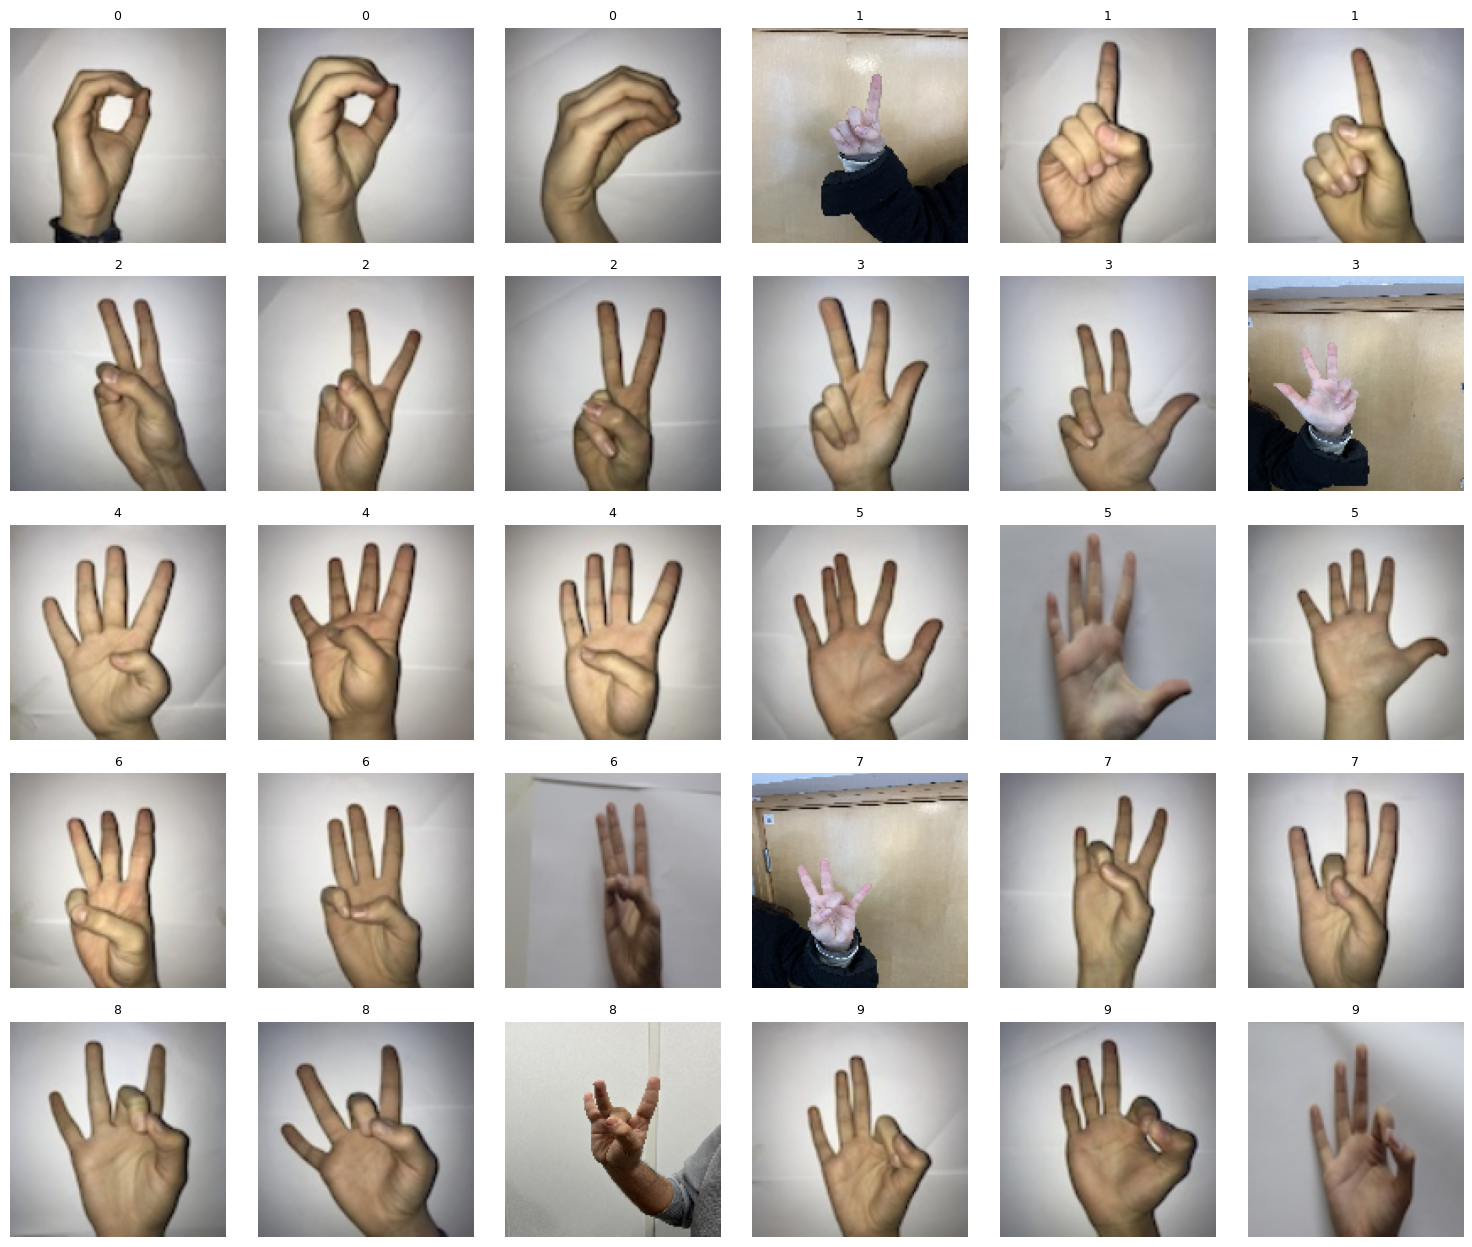

In [ ]:
import os
import cv2
import random
import matplotlib.pyplot as plt

IMG_SIZE = 128

def show_random_images(dataset_dir, samples=3):

    inner_dir = '/content/SL_Numbers_datasets/SL_Numbers_our'

    class_folders = [f for f in os.listdir(inner_dir) if os.path.isdir(os.path.join(inner_dir, f))]

    rows = len(class_folders)
    cols = 6
    plt.figure(figsize=(cols * 2.5, rows * 2.5))
    i = 1

    for label in sorted(class_folders):
        class_path = os.path.join(inner_dir, label)
        images = os.listdir(class_path)
        random.shuffle(images)

        for img_name in images[:samples]:
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)

            if img is None:
                continue

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

            plt.subplot(rows, cols, i)
            plt.imshow(img)
            plt.title(label, fontsize=9)
            plt.axis('off')
            i += 1

    plt.tight_layout()
    plt.show()


show_random_images("/content/SL_Numbers_datasets/SL_Numbers_our", samples=3)


## 2.2 - Check Our Dataset Count

The dataset count was checked. Than ready for the merge with original dataset and our dataset.

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_dir = "/content/SL_Numbers_datasets/SL_Numbers_our"


label_map = {
    "0": "zero", "1": "one", "2": "two", "3": "three", "4": "four",
    "5": "five", "6": "six", "7": "seven", "8": "eight", "9": "nine"
}

def count_images_in_folders(base_dir):
    class_counts = {}
    for class_name in sorted(os.listdir(base_dir)):
        class_path = os.path.join(base_dir, class_name)
        if os.path.isdir(class_path):
            image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            readable_name = label_map.get(class_name, class_name)
            class_counts[readable_name] = len(image_files)
    return class_counts

class_counts = count_images_in_folders(base_dir)

df = pd.DataFrame(list(class_counts.items()), columns=["Class", "Image Count"])
df = df.sort_values("Image Count", ascending=False)


total = df["Image Count"].sum()
print(df)
print(f"\nTotal Image: {total}")



   Class  Image Count
0   zero          251
1    one          251
2    two          251
3  three          251
4   four          251
5   five          251
6    six          251
7  seven          251
9   nine          251
8  eight          248

Total Image: 2507


## 2.3 - Merge Main and Our Dataset

`original_dataset` The folder containing the original images.

`our_dataset_name` The folder containing the our images.

`merged_dataset` The folder where the merged and processed dataset will be output.

A new folder named **merged_dataset** was created. Thus, we did not interfere with the original dataset and our own dataset.


```
label_map = {
    "0": "zero", "1": "one", "2": "two", "3": "three", "4": "four",
    "5": "five", "6": "six", "7": "seven", "8": "eight", "9": "nine"
}
```

Class names are given numerically, such as `0, 1, 2, 3`. The photographs in the classes are named as `zero_1.jpg`, `four_8.jpg`. It is used to find the value corresponding to the class when naming the image.




`SL_Numbers_Our` Each class (tag) folder within it is examined.

```
for fname in os.listdir(target_folder):
    match = re.match(f"{label_name}_(\d+)", fname)
```
Existing files in the target folder are checked. The highest photo name is taken and the newly added photos continue after this index.


In [ ]:
import os
import shutil
import cv2
import re

original_dataset = "/content/SL_Numbers_datasets/SL_Numbers"
our_dataset_name = "/content/SL_Numbers_datasets/SL_Numbers_our"
merged_dataset = "SL_Numbers_merged"
img_size = 64

label_map = {
    "0": "zero", "1": "one", "2": "two", "3": "three", "4": "four",
    "5": "five", "6": "six", "7": "seven", "8": "eight", "9": "nine"
}

# Klasör temizleme/kopyalama
if os.path.exists(merged_dataset):
    shutil.rmtree(merged_dataset)
shutil.copytree(original_dataset, merged_dataset)
print("Original dataset copied to SL_Numbers_merged")

# Her sınıfı işle
for raw_label in os.listdir(our_dataset_name):
    if raw_label not in label_map:
        print(f"Unknown label: {raw_label}")
        continue

    label_name = label_map[raw_label]
    source_folder = os.path.join(our_dataset_name, raw_label)
    target_folder = os.path.join(merged_dataset, raw_label)

    if not os.path.exists(target_folder):
        print(f"Target folder does not exist: {target_folder}")
        continue


    max_index = 0
    for fname in os.listdir(target_folder):
        match = re.match(f"{label_name}_(\d+)", fname)
        if match:
            max_index = max(max_index, int(match.group(1)))

    added_count = 0
    for img_name in os.listdir(source_folder):
        img_path = os.path.join(source_folder, img_name)
        if not img_name.lower().endswith((".jpg", ".jpeg", ".png")):
            continue

        img = cv2.imread(img_path)
        if img is None:
            print(f"Failed to read image: {img_path}")
            continue

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, (img_size, img_size))

        new_index = max_index + 1
        new_filename = f"{label_name}_{new_index}.jpg"
        save_path = os.path.join(target_folder, new_filename)
        cv2.imwrite(save_path, resized)
        max_index = new_index
        added_count += 1

    print(f"Finished processing class: {raw_label} - {added_count} image(s) added ")


Original dataset copied to SL_Numbers_merged
Finished processing class: 2 - 251 image(s) added 
Finished processing class: 4 - 251 image(s) added 
Finished processing class: 0 - 251 image(s) added 
Finished processing class: 6 - 251 image(s) added 
Finished processing class: 3 - 251 image(s) added 
Finished processing class: 1 - 251 image(s) added 
Finished processing class: 5 - 251 image(s) added 
Finished processing class: 7 - 251 image(s) added 
Finished processing class: 8 - 248 image(s) added 
Finished processing class: 9 - 251 image(s) added 


## 2.4 - Check Current**(SL_Numbers_merged)** Dataset

The new dataset count was checked

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_dir = "/content/SL_Numbers_merged"


label_map = {
    "0": "zero", "1": "one", "2": "two", "3": "three", "4": "four",
    "5": "five", "6": "six", "7": "seven", "8": "eight", "9": "nine"
}

def count_images_in_folders(base_dir):
    class_counts = {}
    for class_name in sorted(os.listdir(base_dir)):
        class_path = os.path.join(base_dir, class_name)
        if os.path.isdir(class_path):
            image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            readable_name = label_map.get(class_name, class_name)
            class_counts[readable_name] = len(image_files)
    return class_counts

class_counts = count_images_in_folders(base_dir)

df = pd.DataFrame(list(class_counts.items()), columns=["Class", "Image Count"])
df = df.sort_values("Image Count", ascending=False)


total = df["Image Count"].sum()
print(df)
print(f"\nTotal Image: {total}")

   Class  Image Count
0   zero         1751
1    one         1751
2    two         1751
3  three         1751
4   four         1751
5   five         1751
6    six         1751
7  seven         1751
9   nine         1751
8  eight         1748

Total Image: 17507


## 2.5 - Data Augmentation

By creating a new dataset named SL_Numbers_merged, the real-time detection performance of our model increased. However, some different angles were decreasing the prediction performance and causing errors when making real-time prediction.

In this section, new images were generated from different angles using the merged dataset.

`target_dir = "/content/SL_Numbers_merged_aug"` New Dataset Folder Name and Path

`def rotate(img, angle):` Rotates the image.

```
for i in range(1, 6):  # 5, 10, ..., 25 angles
    angle = i * 5
    rotated = rotate(img, angle)
    save_name = f"{base_name}_L_{i}.jpg"
```
Five new photographs, each rotated five degrees to the left, were generated.

`save_name = f"{base_name}_L_{i}.jpg"` new generated images was saved.

`one_1_L_1.jpg`  (one_1.jpg was rotated **5** degrees left)

`one_1_L_2.jpg  `(one_1.jpg was rotated **10** degrees left)

...

`one_1_R_5.jpg`  (one_1.jpg was rotated **25** degrees left)


```
for i in range(1, 6):  # 5, 10, ..., 25 angles
    angle = -i * 5
    rotated = rotate(img, angle)
    save_name = f"{base_name}_R_{i}.jpg"
```
Five new photographs, each rotated five degrees to the right, were generated.

```
    save_name = f"{base_name}_r_{i}.jpg"
```
Five new photographs, each rotated five degrees to the left, were generated.

`save_name = f"{base_name}_r_{i}.jpg"` new generated images was saved.

`one_1_L_1.jpg`  (one_1.jpg was rotated **5** degrees right)

`one_1_L_2.jpg  `(one_1.jpg was rotated **10** degrees right)

In [ ]:
import os
import cv2

source_dir = "/content/SL_Numbers_datasets/SL_Numbers_merged"
target_dir = "/content/SL_Numbers_merged_aug"
img_size = 64

# Label → filename prefix map
label_map = {
    "0": "zero", "1": "one", "2": "two", "3": "three", "4": "four",
    "5": "five", "6": "six", "7": "seven", "8": "eight", "9": "nine"
}

def rotate(img, angle):
    h, w = img.shape[:2]
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(img, matrix, (w, h), borderMode=cv2.BORDER_REPLICATE)

total_augmented = 0


for label in os.listdir(source_dir):
    src_folder = os.path.join(source_dir, label)
    dst_folder = os.path.join(target_dir, label)
    os.makedirs(dst_folder, exist_ok=True)

    label_prefix = label_map.get(label, label)

    class_augmented = 0

    for fname in os.listdir(src_folder):
        if not fname.lower().endswith(".jpg"):
            continue

        fpath = os.path.join(src_folder, fname)
        img = cv2.imread(fpath, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Failed to read: {fname}")
            continue

        base_name = fname.split(".")[0]

        for i in range(1, 6):  # For Left
            angle = i * 5
            rotated = rotate(img, angle)
            save_name = f"{base_name}_L_{i}.jpg"
            save_path = os.path.join(dst_folder, save_name)
            cv2.imwrite(save_path, rotated)
            class_augmented += 1
            total_augmented += 1

        for i in range(1, 6):  # For Right
            angle = -i * 5
            rotated = rotate(img, angle)
            save_name = f"{base_name}_R_{i}.jpg"
            save_path = os.path.join(dst_folder, save_name)
            cv2.imwrite(save_path, rotated)
            class_augmented += 1
            total_augmented += 1

    print(f" Finished processing class: {label} - {class_augmented} image added")

print(f"\nTotal Image: {total_augmented}")


 Finished processing class: 2 - 17510 image added
 Finished processing class: 4 - 17510 image added
 Finished processing class: 0 - 17510 image added
 Finished processing class: 6 - 17510 image added
 Finished processing class: 3 - 17510 image added
 Finished processing class: 1 - 17510 image added
 Finished processing class: 5 - 17510 image added
 Finished processing class: 7 - 17510 image added
 Finished processing class: 8 - 17480 image added
 Finished processing class: 9 - 17510 image added

Total Image: 175070


## 2.6 - Check Data Augmentation Image

New merged and augmentation dataset was controlled with first 10 images.

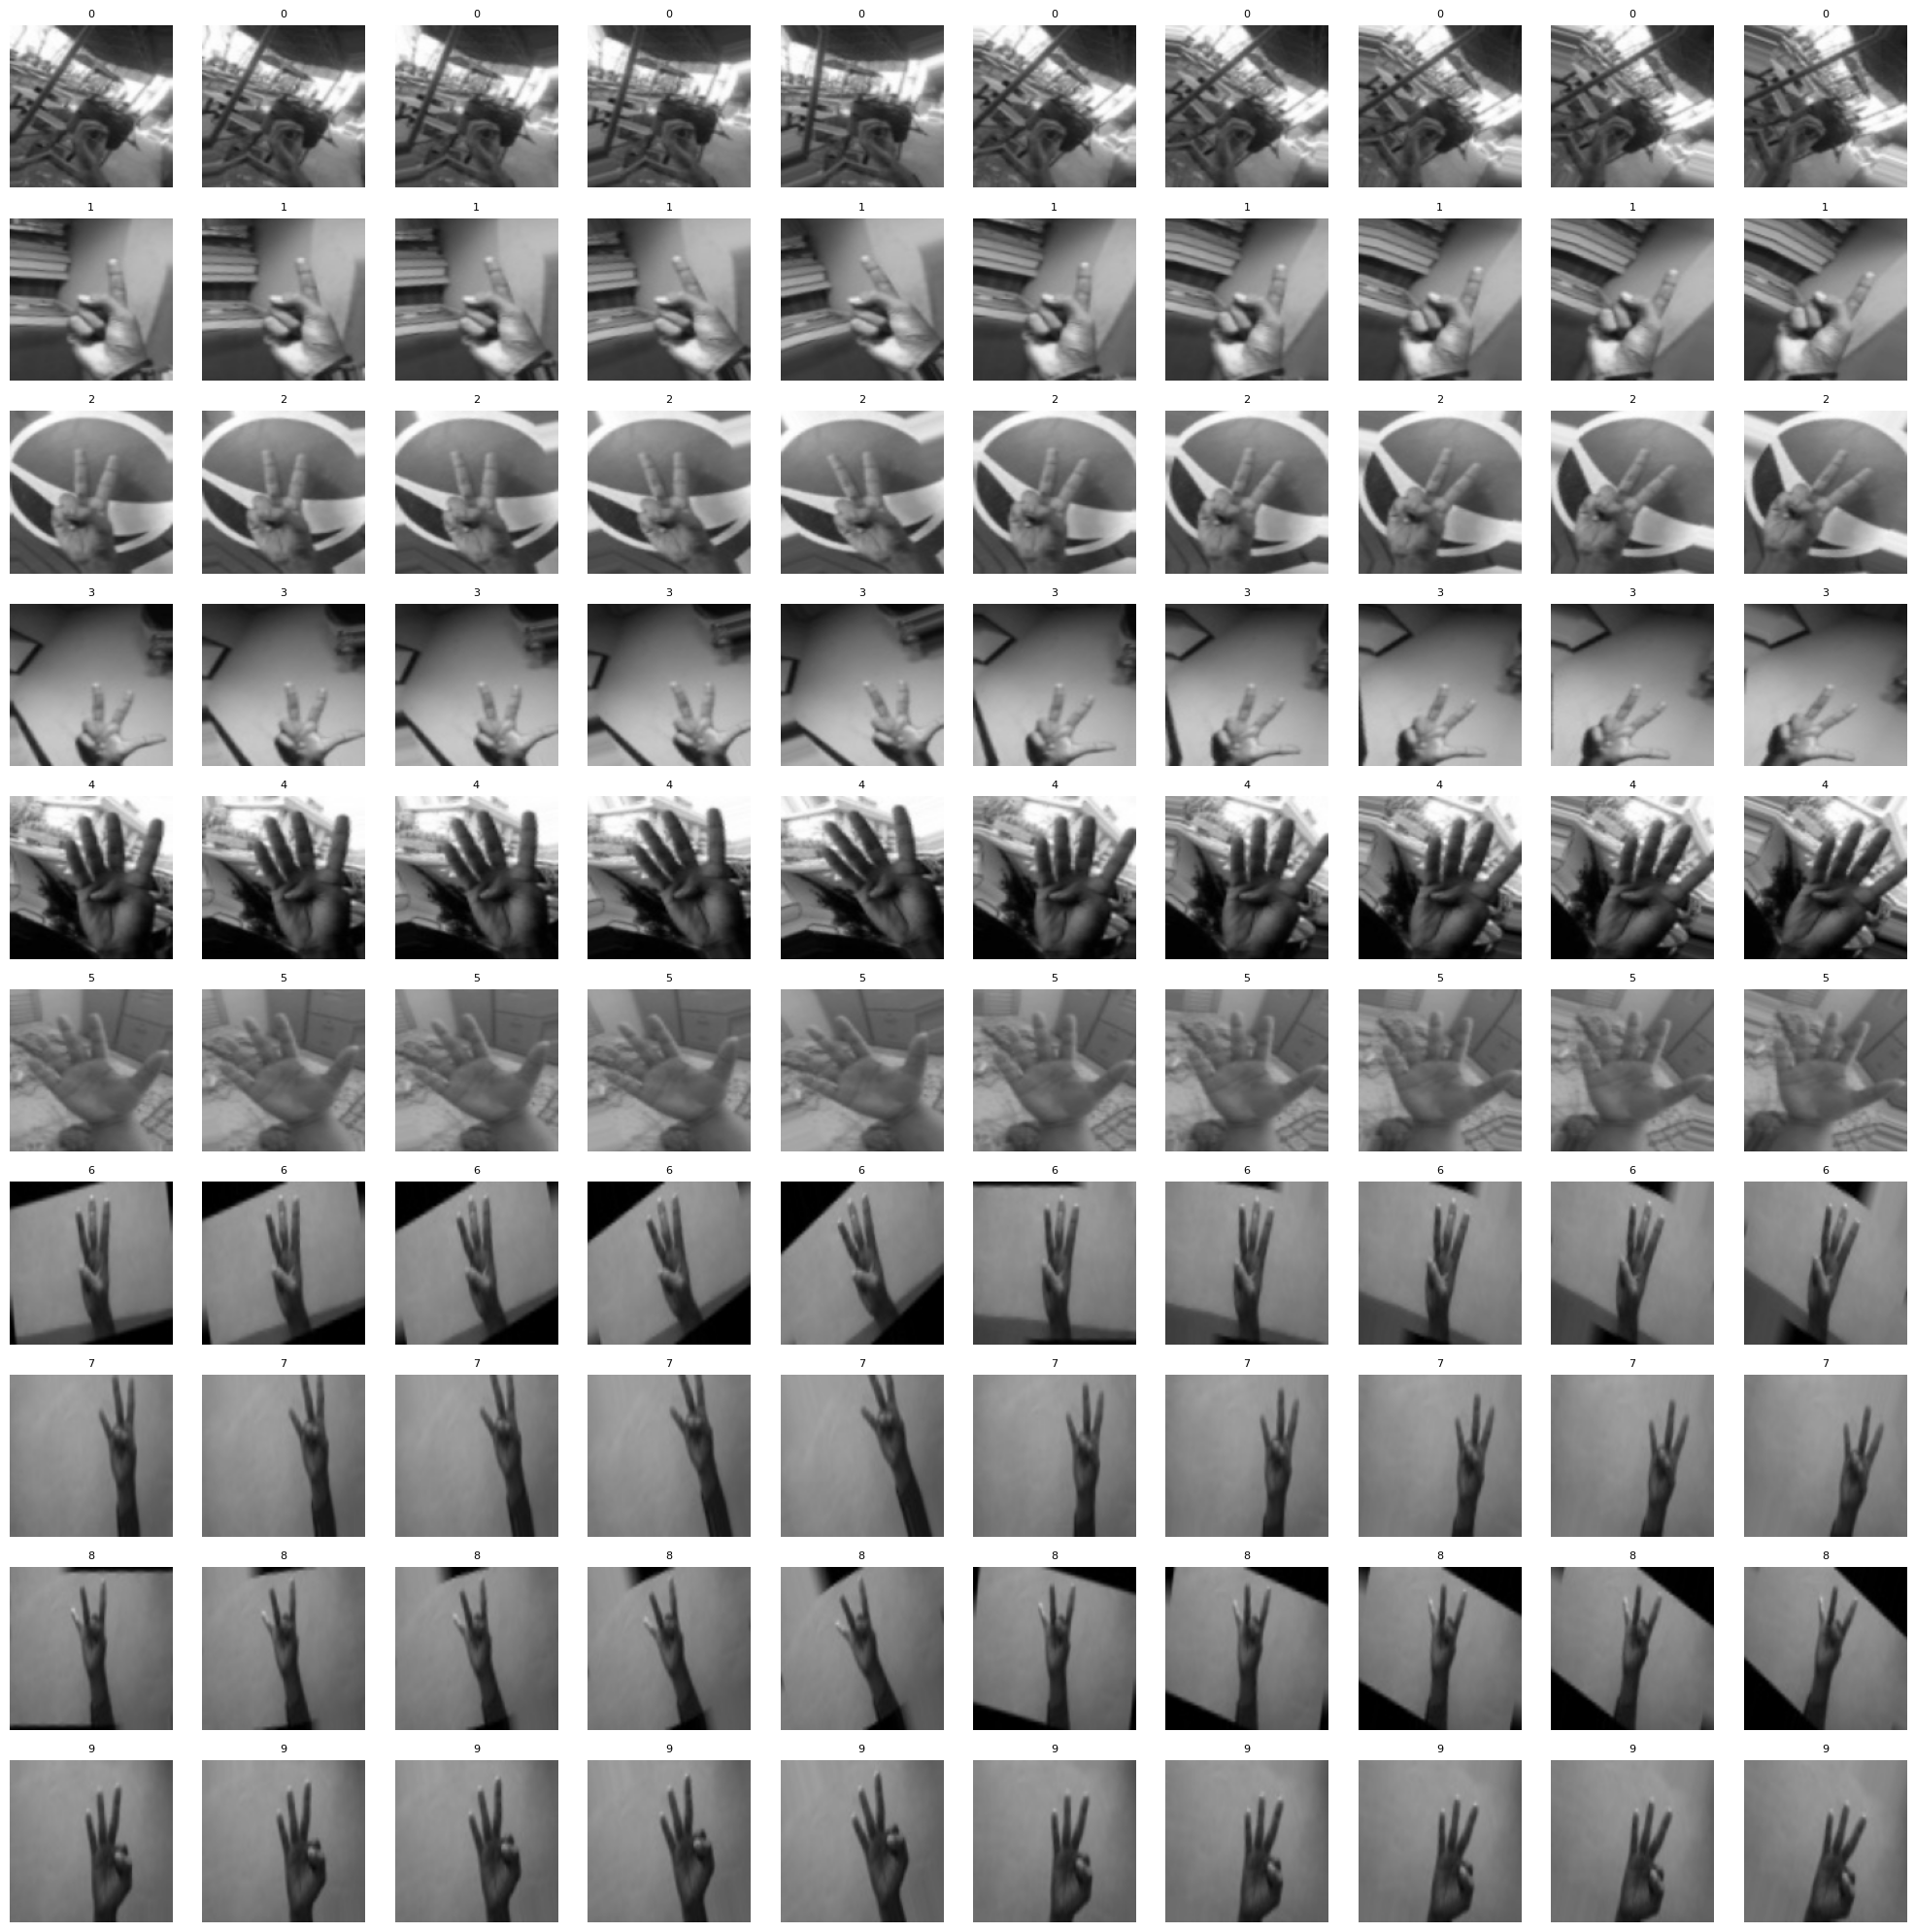

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

IMG_SIZE = 128

def show_first_images(dataset_dir, samples=10):
    class_folders = [f for f in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, f))]

    rows = len(class_folders)
    cols = samples
    plt.figure(figsize=(cols * 2, rows * 2))
    i = 1

    for label in sorted(class_folders):
        class_path = os.path.join(dataset_dir, label)
        images = sorted(os.listdir(class_path))[:samples]

        for img_name in images:
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)

            if img is None:
                continue

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

            plt.subplot(rows, cols, i)
            plt.imshow(img)
            plt.title(label, fontsize=8)
            plt.axis('off')
            i += 1

    plt.tight_layout()
    plt.show()


show_first_images("/content/SL_Numbers_datasets/SL_Numbers_merged_aug", samples=10)

## 2.7 - Image Path and Label List

In [ ]:
import os
import random

base_dir = "/content/SL_Numbers_datasets/SL_Numbers_merged_aug"
image_label_list = []

# Sample All Class
sample_per_class = {}

for label in sorted(os.listdir(base_dir)):
    class_dir = os.path.join(base_dir, label)
    if not os.path.isdir(class_dir):
        continue
    images = [img for img in os.listdir(class_dir) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]

    for img_name in images:
        img_path = os.path.join(class_dir, img_name)
        image_label_list.append((img_path, int(label)))  # label: 0-9


    if images:
        random_img = random.choice(images)
        random_img_path = os.path.join(class_dir, random_img)
        sample_per_class[label] = random_img_path


print(f"Total Image: {len(image_label_list)}")

for label, img_path in sample_per_class.items():
    print(f"Class {label}: {img_path}")

Total Image: 175070
Class 0: /content/SL_Numbers_datasets/SL_Numbers_merged_aug/0/zero_448_R_4.jpg
Class 1: /content/SL_Numbers_datasets/SL_Numbers_merged_aug/1/one_983_L_2.jpg
Class 2: /content/SL_Numbers_datasets/SL_Numbers_merged_aug/2/two_614_R_3.jpg
Class 3: /content/SL_Numbers_datasets/SL_Numbers_merged_aug/3/three_1327_R_4.jpg
Class 4: /content/SL_Numbers_datasets/SL_Numbers_merged_aug/4/four_1362_L_5.jpg
Class 5: /content/SL_Numbers_datasets/SL_Numbers_merged_aug/5/five_517_R_5.jpg
Class 6: /content/SL_Numbers_datasets/SL_Numbers_merged_aug/6/six_670_L_1.jpg
Class 7: /content/SL_Numbers_datasets/SL_Numbers_merged_aug/7/seven_846_L_2.jpg
Class 8: /content/SL_Numbers_datasets/SL_Numbers_merged_aug/8/eight_1207_R_1.jpg
Class 9: /content/SL_Numbers_datasets/SL_Numbers_merged_aug/9/nine_1582_L_4.jpg


# **3 - Model Training & Evaluation**

## 3.1 - Train / Validation Split & DataLoader Preparation

In [ ]:
from torch.utils.data import Dataset
from PIL import Image

class SignLanguageDataset(Dataset):
    def __init__(self, image_label_list, transform=None):
        self.data = image_label_list  # List: (path, label)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, label = self.data[idx]
        image = Image.open(img_path).convert("RGB")  # Grayscale

        if self.transform:
            image = self.transform(image)

        return image, label

In [ ]:
from sklearn.model_selection import train_test_split
from torchvision import transforms
from torch.utils.data import DataLoader

train_list, val_list = train_test_split(
    image_label_list,
    test_size=0.2,
    stratify=[label for _, label in image_label_list],
    random_state=42
)

In [ ]:
print(f"Train set: {len(train_list)} images")
print(f"Validation set: {len(val_list)} images")


Train set: 140056 images
Validation set: 35014 images


In [ ]:
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

In [ ]:
val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

In [ ]:
train_dataset = SignLanguageDataset(train_list, transform=train_transforms)
val_dataset   = SignLanguageDataset(val_list, transform=val_transforms)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=8, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=8, pin_memory=True)


## 3.2 -CNN - Model Architecture

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SignLanguageCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(SignLanguageCNN, self).__init__()

        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool  = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)

        self.fc1 = nn.Linear(128 * 28 * 28, 256)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # 64x64 → 32x32
        x = self.pool(F.relu(self.conv2(x)))  # 32x32 → 16x16
        x = self.pool(F.relu(self.conv3(x)))  # 16x16 → 8x8
        x = x.view(-1, 128 * 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_cnn = SignLanguageCNN(num_classes=10).to(device)
print(model_cnn)

SignLanguageCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=100352, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


### 3.2.1 - CNN Model Training

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import time


num_epochs = 30
patience = 5
best_val_loss = np.inf
early_stop_counter = 0
save_path = "best_model_cnn.pth"


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_cnn.parameters(), lr=0.001)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []


total_start = time.time()

for epoch in range(num_epochs):
    epoch_start = time.time()

    model_cnn.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_cnn(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    avg_train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    model_cnn.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_cnn(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = 100 * val_correct / val_total
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)


    epoch_time = time.time() - epoch_start


    print(f"Epoch {epoch+1}/{num_epochs} | {epoch_time:.2f}s")
    print(f"  Train Loss: {avg_train_loss:.4f} | Train Acc: {train_accuracy:.2f}%")
    print(f"  Val   Loss: {avg_val_loss:.4f} | Val Acc: {val_accuracy:.2f}%")



    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_epoch = epoch + 1
        early_stop_counter = 0
        torch.save({
            'model_name': 'SignLanguageCNN',
            'state_dict': model_cnn.state_dict()
        }, save_path)
        print(f"Best model was saved at epoch: {best_epoch}")

    else:
        early_stop_counter += 1
        print(f"val_accuracy did not improve ({early_stop_counter}/{patience})")

        if early_stop_counter >= patience:
            print("early stopping")
            break

total_time = time.time() - total_start
minutes = int(total_time // 60)
seconds = int(total_time % 60)
print(f"Training time: {int(minutes)} minutes {int(seconds)} seconds")

Epoch 1/30 | 205.28s
  Train Loss: 0.5749 | Train Acc: 80.73%
  Val   Loss: 0.2870 | Val Acc: 90.79%
Best model was saved at epoch: 1
Epoch 2/30 | 204.09s
  Train Loss: 0.1844 | Train Acc: 94.05%
  Val   Loss: 0.1832 | Val Acc: 94.28%
Best model was saved at epoch: 2
Epoch 3/30 | 204.08s
  Train Loss: 0.1032 | Train Acc: 96.65%
  Val   Loss: 0.1531 | Val Acc: 95.27%
Best model was saved at epoch: 3
Epoch 4/30 | 203.92s
  Train Loss: 0.0692 | Train Acc: 97.77%
  Val   Loss: 0.1228 | Val Acc: 96.28%
Best model was saved at epoch: 4
Epoch 5/30 | 203.86s
  Train Loss: 0.0520 | Train Acc: 98.30%
  Val   Loss: 0.1473 | Val Acc: 95.86%
val_accuracy did not improve (1/5)
Epoch 6/30 | 203.73s
  Train Loss: 0.0378 | Train Acc: 98.79%
  Val   Loss: 0.1200 | Val Acc: 96.76%
Best model was saved at epoch: 6
Epoch 7/30 | 203.68s
  Train Loss: 0.0329 | Train Acc: 98.97%
  Val   Loss: 0.1271 | Val Acc: 96.88%
val_accuracy did not improve (1/5)
Epoch 8/30 | 203.51s
  Train Loss: 0.0276 | Train Acc: 99.

### 3.2.2 - CNN Model Training Visualization

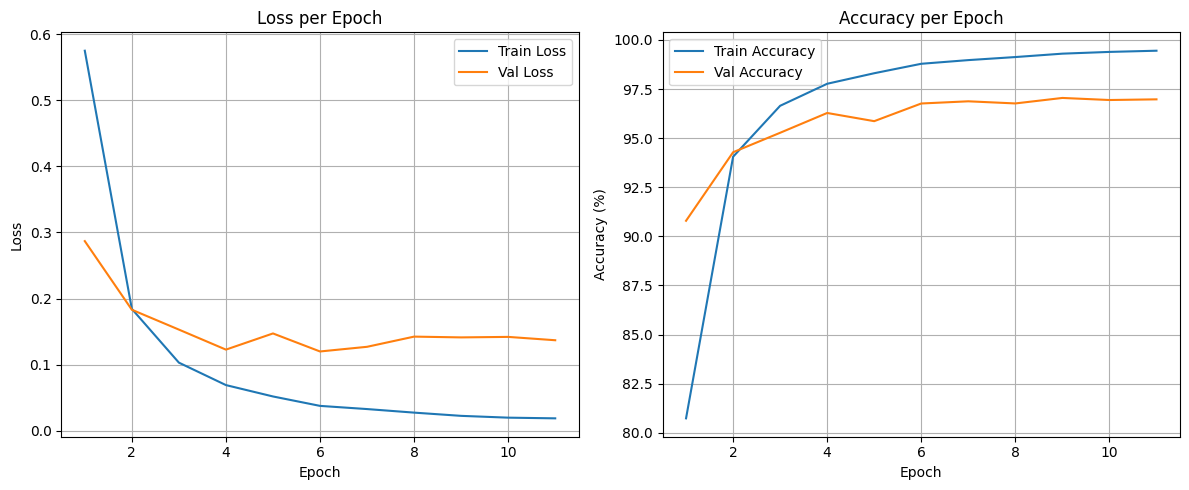

In [ ]:
import matplotlib.pyplot as plt

epochs_range = range(1, len(train_losses) + 1)

# Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label="Train Loss")
plt.plot(epochs_range, val_losses, label="Val Loss")
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracies, label="Train Accuracy")
plt.plot(epochs_range, val_accuracies, label="Val Accuracy")
plt.title("Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### 3.2.3 - Confusion Matrix & Model Evaluation

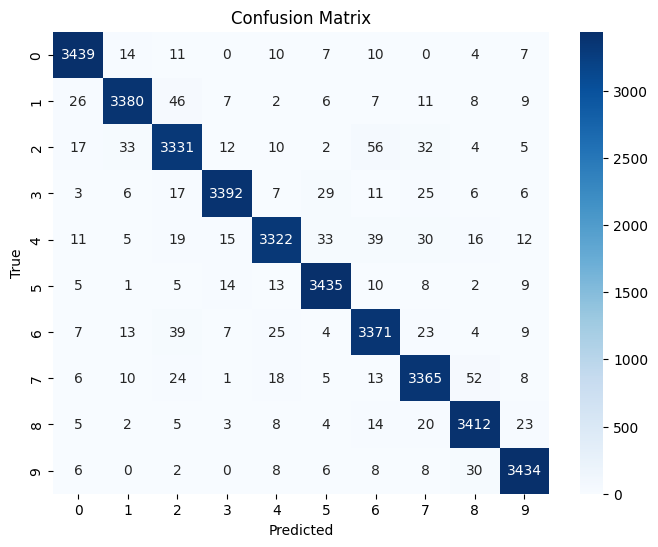

In [ ]:
from sklearn.metrics import confusion_matrix

import torch
import torch.nn as nn
import torch.nn.functional as F

class SignLanguageCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(SignLanguageCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(128 * 28 * 28, 256)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model = SignLanguageCNN()
checkpoint = torch.load("/content/best_model_cnn.pth", map_location=device)
model.load_state_dict(checkpoint['state_dict'])
model.to(device)  # 🔑 Model GPU'ya taşındı
model.eval()


all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
def clear_memory():
    import gc
    import torch

    gc.collect()
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
        torch.cuda.ipc_collect()
    print("Memory was cleaned")

clear_memory()

Memory was cleaned


## 3.3 - VGG16 Transfer Learning Model Architectire

In [ ]:
import torch
import torch.nn as nn
from torchvision import models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class VGG16SignLanguage(nn.Module):
    def __init__(self, num_classes=10, freeze=True):
        super(VGG16SignLanguage, self).__init__()

        self.base_model = models.vgg16(pretrained=True)

        if freeze:
            for param in self.base_model.features.parameters():
                param.requires_grad = False

        self.base_model.classifier[6] = nn.Linear(4096, num_classes)

    def forward(self, x):
        return self.base_model(x)

model_vgg = VGG16SignLanguage(num_classes=10, freeze=True).to(device)


print(model_vgg)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 187MB/s]


VGG16SignLanguage(
  (base_model): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=Tru

In [ ]:
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

### 3.3.1 - VGG16 Model Training

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import time
from torchvision import models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model_vgg.parameters()), lr=0.001)  # sadece eğitilen katmanlar
num_epochs = 30
patience = 5
best_val_loss = np.inf
early_stop_counter = 0
save_path = "best_model_vgg16.pth"

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

total_start = time.time()

for epoch in range(num_epochs):
    epoch_start = time.time()

    model_vgg.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_vgg(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    avg_train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    model_vgg.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_vgg(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = 100 * val_correct / val_total
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

    epoch_time = time.time() - epoch_start

    print(f"Epoch {epoch+1}/{num_epochs} | {epoch_time:.2f}s")
    print(f"  Train Loss: {avg_train_loss:.4f} | Train Acc: {train_accuracy:.2f}%")
    print(f"  Val   Loss: {avg_val_loss:.4f} | Val Acc: {val_accuracy:.2f}%")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_epoch = epoch + 1
        early_stop_counter = 0
        torch.save({
            'model_name': 'VGG16SignLanguage',
            'state_dict': model_vgg.state_dict()
        }, save_path)
        print(f"Best model was saved at epoch: {best_epoch}")

    else:
        early_stop_counter += 1
        print(f"val_accuracy did not improve ({early_stop_counter}/{patience})")

        if early_stop_counter >= patience:
            print("early stopping")
            break

total_time = time.time() - total_start
minutes = int(total_time // 60)
seconds = int(total_time % 60)
print(f"Training time: {int(minutes)} minutes {int(seconds)} seconds")

Epoch 1/30 | 605.68s
  Train Loss: 0.5008 | Train Acc: 87.82%
  Val   Loss: 0.1391 | Val Acc: 95.80%
Best model was saved at epoch: 1
Epoch 2/30 | 605.35s
  Train Loss: 0.3434 | Train Acc: 92.98%
  Val   Loss: 0.1045 | Val Acc: 96.64%
Best model was saved at epoch: 2
Epoch 3/30 | 605.19s
  Train Loss: 0.3078 | Train Acc: 94.24%
  Val   Loss: 0.0836 | Val Acc: 97.45%
Best model was saved at epoch: 3
Epoch 4/30 | 605.05s
  Train Loss: 0.2803 | Train Acc: 94.75%
  Val   Loss: 0.0942 | Val Acc: 97.06%
val_accuracy did not improve (1/5)
Epoch 5/30 | 604.93s
  Train Loss: 0.2609 | Train Acc: 95.29%
  Val   Loss: 0.0904 | Val Acc: 97.07%
val_accuracy did not improve (2/5)
Epoch 6/30 | 604.90s
  Train Loss: 0.2353 | Train Acc: 95.52%
  Val   Loss: 0.0850 | Val Acc: 97.26%
val_accuracy did not improve (3/5)
Epoch 7/30 | 604.87s
  Train Loss: 0.2351 | Train Acc: 95.80%
  Val   Loss: 0.0814 | Val Acc: 97.36%
Best model was saved at epoch: 7
Epoch 8/30 | 604.93s
  Train Loss: 0.2253 | Train Acc: 9

### 3.3.2 - VGG16 Model Training Visualization

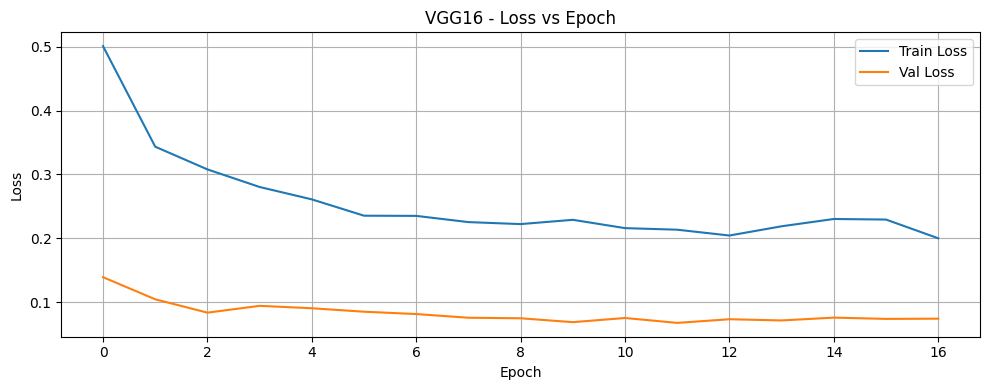

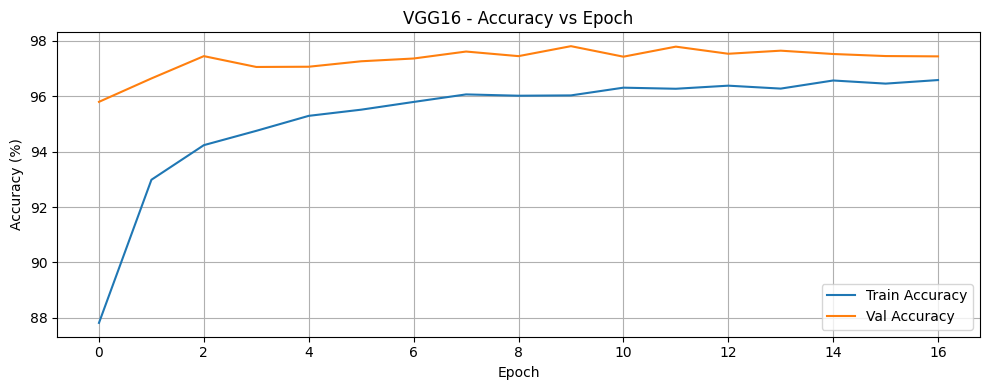

In [ ]:
import matplotlib.pyplot as plt

# Loss
plt.figure(figsize=(10, 4))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.title("VGG16 - Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Accuracy
plt.figure(figsize=(10, 4))
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(val_accuracies, label="Val Accuracy")
plt.title("VGG16 - Accuracy vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 3.3.3 - Confusion Matrix & Model Evaluation

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


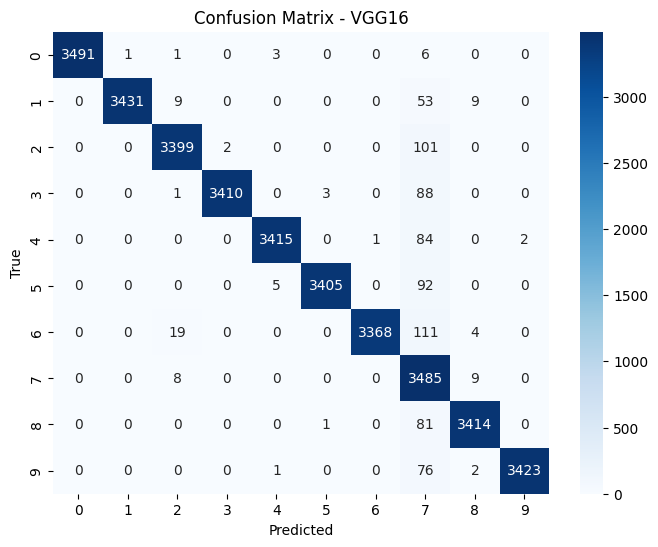

In [ ]:
import torch
import torch.nn as nn
from torchvision import models
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class VGG16SignLanguage(nn.Module):
    def __init__(self, num_classes=10, freeze=True):
        super(VGG16SignLanguage, self).__init__()
        self.base_model = models.vgg16(pretrained=False)

        if freeze:
            for param in self.base_model.features.parameters():
                param.requires_grad = False

        self.base_model.classifier[6] = nn.Linear(4096, num_classes)

    def forward(self, x):
        return self.base_model(x)

model = VGG16SignLanguage(num_classes=10).to(device)

checkpoint = torch.load("/content/best_model_vgg16.pth", map_location=device)
model.load_state_dict(checkpoint['state_dict'])
model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)
class_names = [str(i) for i in range(10)]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - VGG16")
plt.show()

## 3.4 - ResNet50 Transfer Learning Model Architecture

In [ ]:
import torch.nn as nn
from torchvision import models

class ResNet50SignLanguage(nn.Module):
    def __init__(self, num_classes=10, freeze=True):
        super(ResNet50SignLanguage, self).__init__()
        self.base_model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)

        if freeze:
            for param in self.base_model.parameters():
                param.requires_grad = False

        in_features = self.base_model.fc.in_features
        self.base_model.fc = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.base_model(x)

model_resnet = ResNet50SignLanguage(num_classes=10, freeze=True).to(device)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 210MB/s]


In [ ]:
model_resnet = ResNet50SignLanguage(num_classes=10, freeze=True).to(device)
print(model_resnet)

ResNet50SignLanguage(
  (base_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequen

### 3.4.1 ResNet50 Model Training

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import time


num_epochs = 30
patience = 5
best_val_loss = np.inf
early_stop_counter = 0
save_path = "best_model_resnet50.pth"


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_resnet.parameters(), lr=0.001)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []


total_start = time.time()

for epoch in range(num_epochs):
    epoch_start = time.time()

    model_resnet.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_resnet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    avg_train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    model_resnet.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_resnet(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = 100 * val_correct / val_total
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)


    epoch_time = time.time() - epoch_start


    print(f"Epoch {epoch+1}/{num_epochs} | {epoch_time:.2f}s")
    print(f"  Train Loss: {avg_train_loss:.4f} | Train Acc: {train_accuracy:.2f}%")
    print(f"  Val   Loss: {avg_val_loss:.4f} | Val Acc: {val_accuracy:.2f}%")



    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_epoch = epoch + 1
        early_stop_counter = 0
        torch.save({
            'model_name': 'ResNet50SignLanguage',
            'state_dict': model_resnet.state_dict()
        }, save_path)
        print(f"Best model was saved at epoch: {best_epoch}")

    else:
        early_stop_counter += 1
        print(f"val_accuracy did not improve ({early_stop_counter}/{patience})")

        if early_stop_counter >= patience:
            print("early stopping")
            break

total_time = time.time() - total_start
minutes = int(total_time // 60)
seconds = int(total_time % 60)
print(f"Training time: {int(minutes)} minutes {int(seconds)} seconds")

Epoch 1/30 | 254.67s
  Train Loss: 0.8874 | Train Acc: 72.81%
  Val   Loss: 0.6253 | Val Acc: 80.82%
Best model was saved at epoch: 1
Epoch 2/30 | 254.11s
  Train Loss: 0.6022 | Train Acc: 80.67%
  Val   Loss: 0.5526 | Val Acc: 82.07%
Best model was saved at epoch: 2
Epoch 3/30 | 254.17s
  Train Loss: 0.5497 | Train Acc: 81.89%
  Val   Loss: 0.5122 | Val Acc: 83.34%
Best model was saved at epoch: 3
Epoch 4/30 | 254.08s
  Train Loss: 0.5249 | Train Acc: 82.80%
  Val   Loss: 0.4893 | Val Acc: 83.80%
Best model was saved at epoch: 4
Epoch 5/30 | 254.22s
  Train Loss: 0.5126 | Train Acc: 82.98%
  Val   Loss: 0.4959 | Val Acc: 83.66%
val_accuracy did not improve (1/5)
Epoch 6/30 | 254.14s
  Train Loss: 0.5046 | Train Acc: 83.21%
  Val   Loss: 0.4992 | Val Acc: 83.56%
val_accuracy did not improve (2/5)
Epoch 7/30 | 254.22s
  Train Loss: 0.4977 | Train Acc: 83.41%
  Val   Loss: 0.4763 | Val Acc: 84.16%
Best model was saved at epoch: 7
Epoch 8/30 | 253.87s
  Train Loss: 0.4941 | Train Acc: 83.

### 3.4.2 - ResNet50 Model Training Visualization

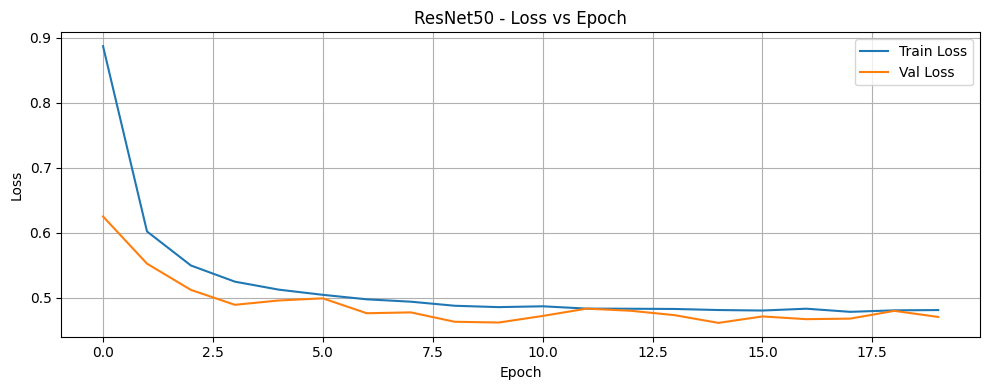

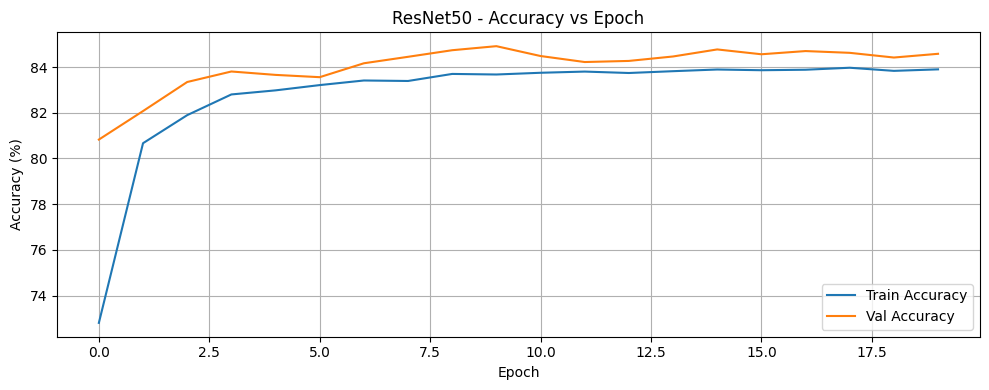

In [ ]:
import matplotlib.pyplot as plt

# Loss
plt.figure(figsize=(10, 4))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.title("ResNet50 - Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Accuracy
plt.figure(figsize=(10, 4))
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(val_accuracies, label="Val Accuracy")
plt.title("ResNet50 - Accuracy vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 3.4.3 - ResNet50 -  Confusion Matrix & Model Evaluation

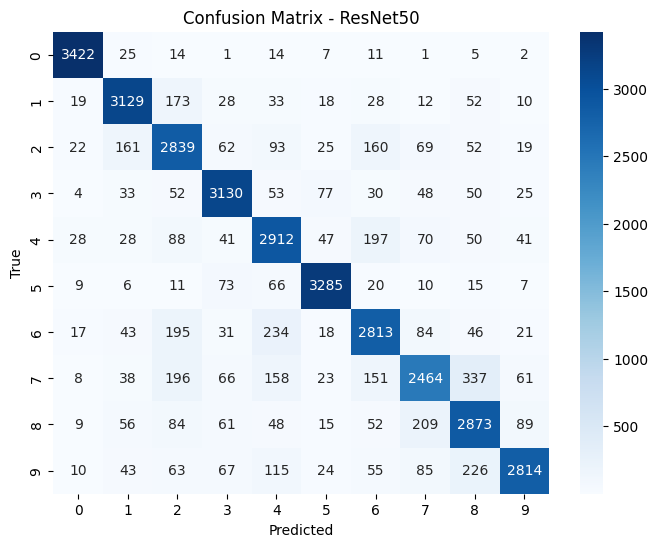

In [ ]:
import torch
import torch.nn as nn
from torchvision import models
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

class ResNet50SignLanguage(nn.Module):
    def __init__(self, num_classes=10, freeze=True):
        super(ResNet50SignLanguage, self).__init__()
        self.base_model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)

        if freeze:
            for param in self.base_model.parameters():
                param.requires_grad = False

        in_features = self.base_model.fc.in_features
        self.base_model.fc = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.base_model(x)

# Load the model using the global variable model_resnet
model_resnet = ResNet50SignLanguage(num_classes=10, freeze=True).to(device) # Define model_resnet within this cell

checkpoint = torch.load("/content/best_model_resnet50.pth", map_location=device)

# Use model_resnet instead of model
model_resnet.load_state_dict(checkpoint['state_dict'])
model_resnet.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        # Use model_resnet instead of model
        outputs = model_resnet(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)
class_names = [str(i) for i in range(10)]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - ResNet50")
plt.show()

In [ ]:
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names))

### 3.4.4 - ResNet50 Fine Tuning

In [ ]:
model_resnet = ResNet50SignLanguage(num_classes=10, freeze=False).to(device)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import time


num_epochs = 30
patience = 3
best_val_loss = np.inf
early_stop_counter = 0
save_path = "best_model_resnet50_finetuning.pth"


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_resnet.parameters(), lr=0.001)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []


total_start = time.time()

for epoch in range(num_epochs):
    epoch_start = time.time()

    model_resnet.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_resnet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    avg_train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    model_resnet.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_resnet(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = 100 * val_correct / val_total
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)


    epoch_time = time.time() - epoch_start


    print(f"Epoch {epoch+1}/{num_epochs} | {epoch_time:.2f}s")
    print(f"  Train Loss: {avg_train_loss:.4f} | Train Acc: {train_accuracy:.2f}%")
    print(f"  Val   Loss: {avg_val_loss:.4f} | Val Acc: {val_accuracy:.2f}%")



    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_epoch = epoch + 1
        early_stop_counter = 0
        torch.save({
            'model_name': 'ResNet50SignLanguage',
            'state_dict': model_resnet.state_dict()
        }, save_path)
        print(f"Best model was saved at epoch: {best_epoch}")

    else:
        early_stop_counter += 1
        print(f"val_accuracy did not improve ({early_stop_counter}/{patience})")

        if early_stop_counter >= patience:
            print("early stopping")
            break

total_time = time.time() - total_start
minutes = int(total_time // 60)
seconds = int(total_time % 60)
print(f"Training time: {int(minutes)} minutes {int(seconds)} seconds")

Epoch 1/30 | 681.00s
  Train Loss: 0.0771 | Train Acc: 97.63%
  Val   Loss: 0.1447 | Val Acc: 96.35%
Best model was saved at epoch: 1
Epoch 2/30 | 680.97s
  Train Loss: 0.0273 | Train Acc: 99.15%
  Val   Loss: 0.0474 | Val Acc: 98.77%
Best model was saved at epoch: 2
Epoch 3/30 | 680.83s
  Train Loss: 0.0181 | Train Acc: 99.43%
  Val   Loss: 0.0102 | Val Acc: 99.69%
Best model was saved at epoch: 3
Epoch 4/30 | 680.85s
  Train Loss: 0.0122 | Train Acc: 99.62%
  Val   Loss: 0.0108 | Val Acc: 99.67%
val_accuracy did not improve (1/3)
Epoch 5/30 | 682.18s
  Train Loss: 0.0099 | Train Acc: 99.69%
  Val   Loss: 0.0035 | Val Acc: 99.90%
Best model was saved at epoch: 5
Epoch 6/30 | 681.70s
  Train Loss: 0.0084 | Train Acc: 99.74%
  Val   Loss: 0.0030 | Val Acc: 99.90%
Best model was saved at epoch: 6
Epoch 7/30 | 681.61s
  Train Loss: 0.0064 | Train Acc: 99.82%
  Val   Loss: 0.0048 | Val Acc: 99.88%
val_accuracy did not improve (1/3)
Epoch 8/30 | 681.50s
  Train Loss: 0.0060 | Train Acc: 99.

### 3.4.5 - ResNet50 Fine Tuning Training Visualization

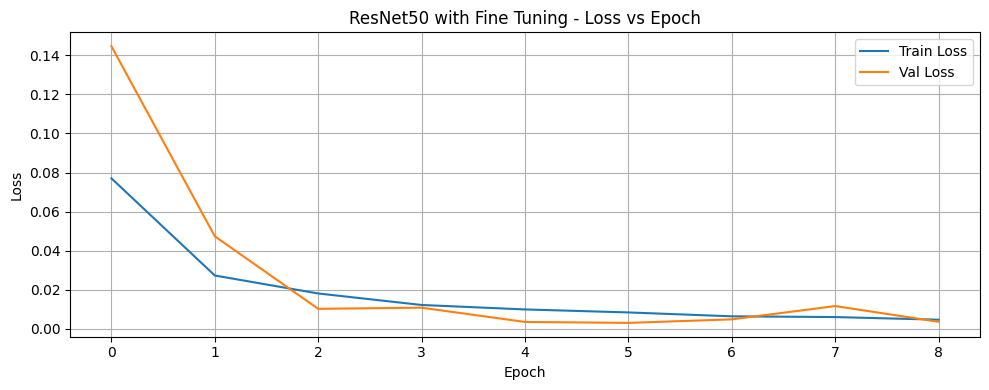

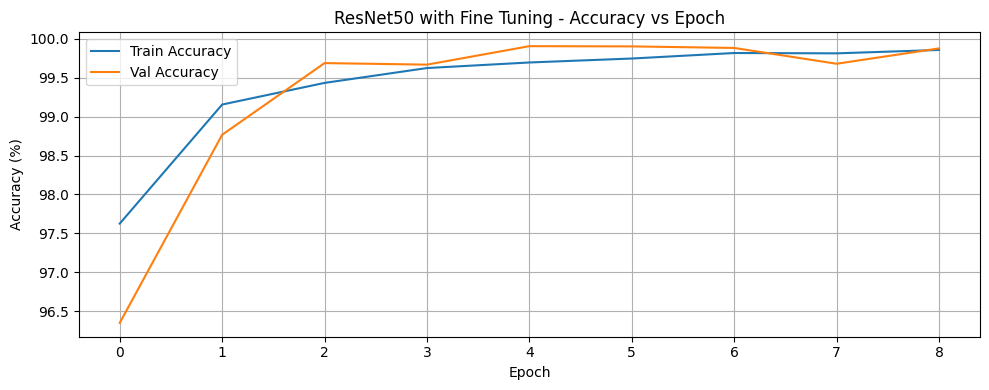

In [ ]:
import matplotlib.pyplot as plt

# Loss
plt.figure(figsize=(10, 4))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.title("ResNet50 with Fine Tuning - Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Accuracy
plt.figure(figsize=(10, 4))
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(val_accuracies, label="Val Accuracy")
plt.title("ResNet50 with Fine Tuning - Accuracy vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 3.4.6 - ResNet50 Fine-Tuned -  Confusion Matrix & Model Evaluation

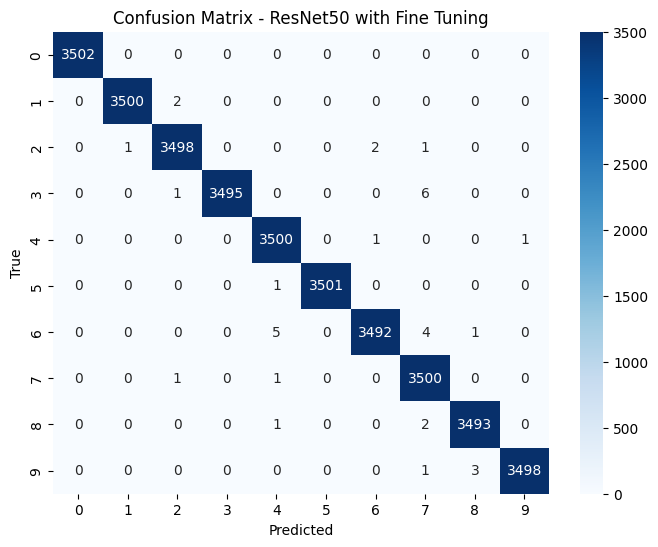

In [ ]:
import torch
import torch.nn as nn
from torchvision import models
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

class ResNet50SignLanguage(nn.Module):
    def __init__(self, num_classes=10, freeze=True):
        super(ResNet50SignLanguage, self).__init__()
        self.base_model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)

        if freeze:
            for param in self.base_model.parameters():
                param.requires_grad = False

        in_features = self.base_model.fc.in_features
        self.base_model.fc = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.base_model(x)

# Load the model using the global variable model_resnet
model_resnet = ResNet50SignLanguage(num_classes=10, freeze=True).to(device) # Define model_resnet within this cell

checkpoint = torch.load("/content/best_model_resnet50_finetuning.pth", map_location=device)

# Use model_resnet instead of model
model_resnet.load_state_dict(checkpoint['state_dict'])
model_resnet.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        # Use model_resnet instead of model
        outputs = model_resnet(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)
class_names = [str(i) for i in range(10)]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - ResNet50 with Fine Tuning")
plt.show()

# 3.5 - MobileNetV2 Transfer Learning Model Architecture

In [ ]:
import torch
import torch.nn as nn
from torchvision import models

# Define device here
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class MobileNetV2SignLanguage(nn.Module):
    def __init__(self, num_classes=10, freeze=True):
        super(MobileNetV2SignLanguage, self).__init__()
        self.base_model = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.DEFAULT)

        if freeze:
            for param in self.base_model.features.parameters():
                param.requires_grad = False


        in_features = self.base_model.classifier[1].in_features
        self.base_model.classifier[1] = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.base_model(x)

model_mobilenet = MobileNetV2SignLanguage(num_classes=10, freeze=True).to(device)

## 3.5.1 - MobileNetV2 Model Training

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import time

num_epochs = 30
patience = 5
best_val_loss = np.inf
early_stop_counter = 0
save_path = "best_model_mobilenetv2.pth"


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_mobilenet.parameters(), lr=0.001)


train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

total_start = time.time()

for epoch in range(num_epochs):
    epoch_start = time.time()

    model_mobilenet.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_mobilenet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    avg_train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    model_mobilenet.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_mobilenet(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = 100 * val_correct / val_total
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

    epoch_time = time.time() - epoch_start

    print(f"Epoch {epoch+1}/{num_epochs} | {epoch_time:.2f}s")
    print(f"  Train Loss: {avg_train_loss:.4f} | Train Acc: {train_accuracy:.2f}%")
    print(f"  Val   Loss: {avg_val_loss:.4f} | Val Acc: {val_accuracy:.2f}%")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_epoch = epoch + 1
        early_stop_counter = 0
        torch.save({
            'model_name': 'MobileNetV2SignLanguage',
            'state_dict': model_mobilenet.state_dict()
        }, save_path)
        print(f"Best model was saved at epoch: {best_epoch}")

    else:
        early_stop_counter += 1
        print(f"val_accuracy did not improve ({early_stop_counter}/{patience})")

        if early_stop_counter >= patience:
            print("early stopping")
            break

total_time = time.time() - total_start
minutes = int(total_time // 60)
seconds = int(total_time % 60)
print(f"Training time: {int(minutes)} minutes {int(seconds)} seconds")

Epoch 1/30 | 111.30s
  Train Loss: 0.9893 | Train Acc: 68.08%
  Val   Loss: 0.6884 | Val Acc: 77.59%
Best model was saved at epoch: 1
Epoch 2/30 | 110.70s
  Train Loss: 0.8119 | Train Acc: 72.51%
  Val   Loss: 0.6434 | Val Acc: 78.63%
Best model was saved at epoch: 2
Epoch 3/30 | 110.71s
  Train Loss: 0.7940 | Train Acc: 73.04%
  Val   Loss: 0.6280 | Val Acc: 79.02%
Best model was saved at epoch: 3
Epoch 4/30 | 110.69s
  Train Loss: 0.7882 | Train Acc: 73.09%
  Val   Loss: 0.6089 | Val Acc: 79.60%
Best model was saved at epoch: 4
Epoch 5/30 | 110.69s
  Train Loss: 0.7844 | Train Acc: 73.28%
  Val   Loss: 0.5969 | Val Acc: 79.96%
Best model was saved at epoch: 5
Epoch 6/30 | 110.77s
  Train Loss: 0.7855 | Train Acc: 73.28%
  Val   Loss: 0.5952 | Val Acc: 80.03%
Best model was saved at epoch: 6
Epoch 7/30 | 110.67s
  Train Loss: 0.7868 | Train Acc: 73.34%
  Val   Loss: 0.6087 | Val Acc: 79.58%
val_accuracy did not improve (1/5)
Epoch 8/30 | 110.65s
  Train Loss: 0.7843 | Train Acc: 73.12

## 3.5.2 - MobileNetV2 Model Training Visualization

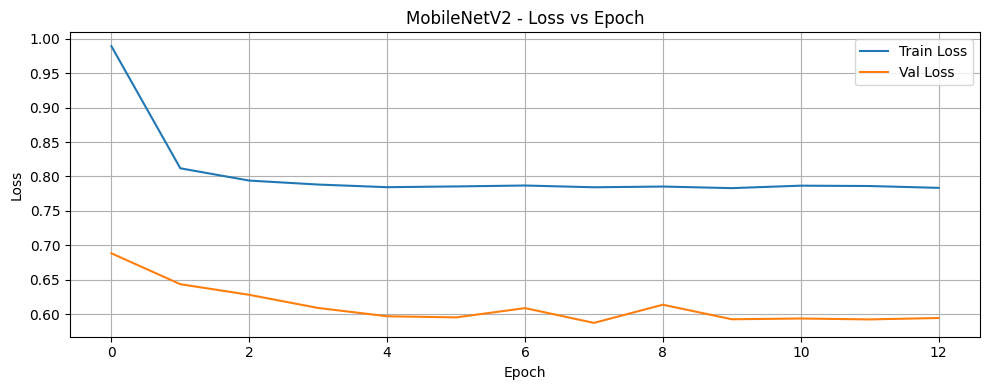

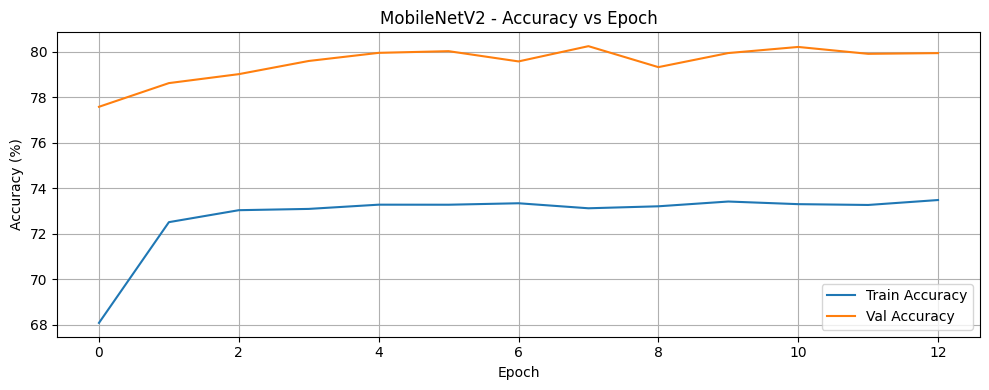

In [ ]:
import matplotlib.pyplot as plt

# Loss
plt.figure(figsize=(10, 4))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.title("MobileNetV2 - Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Accuracy
plt.figure(figsize=(10, 4))
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(val_accuracies, label="Val Accuracy")
plt.title("MobileNetV2 - Accuracy vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 3.5.3 - MobileNetV2 - Confusion Matrix

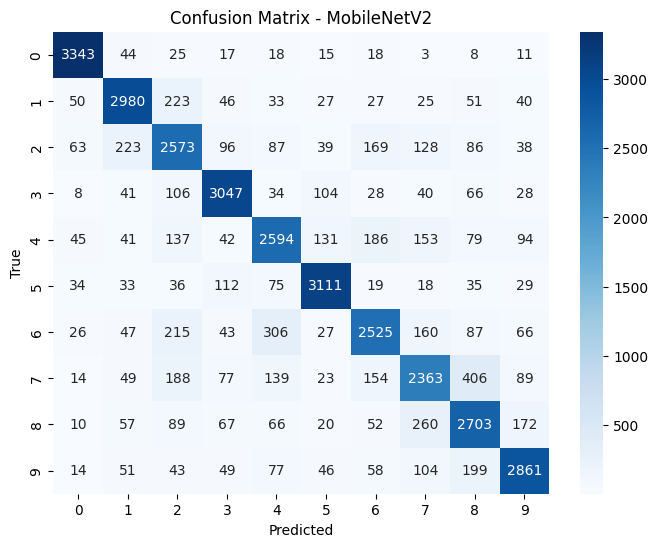

In [ ]:
import torch
import torch.nn as nn
from torchvision import models
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# MobileNetV2 model Class
class MobileNetV2SignLanguage(nn.Module):
    def __init__(self, num_classes=10, freeze=True):
        super(MobileNetV2SignLanguage, self).__init__()
        self.base_model = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.DEFAULT)

        if freeze:
            for param in self.base_model.features.parameters():
                param.requires_grad = False

        in_features = self.base_model.classifier[1].in_features
        self.base_model.classifier[1] = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.base_model(x)

# Load Weight
model_mobilenet = MobileNetV2SignLanguage(num_classes=10, freeze=True).to(device)

checkpoint = torch.load("/content/best_model_mobilenetv2.pth", map_location=device)
model_mobilenet.load_state_dict(checkpoint['state_dict'])
model_mobilenet.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_mobilenet(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
class_names = [str(i) for i in range(10)]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - MobileNetV2")
plt.show()

In [ ]:
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3502
           1       0.84      0.85      0.84      3502
           2       0.71      0.73      0.72      3502
           3       0.85      0.87      0.86      3502
           4       0.76      0.74      0.75      3502
           5       0.88      0.89      0.88      3502
           6       0.78      0.72      0.75      3502
           7       0.73      0.67      0.70      3502
           8       0.73      0.77      0.75      3496
           9       0.83      0.82      0.83      3502

    accuracy                           0.80     35014
   macro avg       0.80      0.80      0.80     35014
weighted avg       0.80      0.80      0.80     35014



## 3.5.4 - MobileNetV2 Fine Tuning Architecture

In [ ]:
model_mobilenet = MobileNetV2SignLanguage(num_classes=10, freeze=False).to(device)

In [ ]:
class MobileNetV2SignLanguage(nn.Module):
    def __init__(self, num_classes=10, freeze=False):
        super(MobileNetV2SignLanguage, self).__init__()
        self.base_model = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.DEFAULT)

        if freeze:
            for param in self.base_model.features.parameters():
                param.requires_grad = False

        in_features = self.base_model.classifier[1].in_features
        self.base_model.classifier[1] = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.base_model(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_mobilenet = MobileNetV2SignLanguage(num_classes=10, freeze=False).to(device)


## 3.5.5 - MobileNetV2 Fine Tuning Training

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import time

num_epochs = 30
patience = 3
best_val_loss = float('inf')
early_stop_counter = 0
save_path = "best_model_mobilenetv2_finetuned.pth"

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_mobilenet.parameters(), lr=1e-4)  # Low LR for fine tuning

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

total_start = time.time()

for epoch in range(num_epochs):
    epoch_start = time.time()

    model_mobilenet.train()
    running_loss = 0.0
    correct = 0
    total = 0


    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_mobilenet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    avg_train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    model_mobilenet.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_mobilenet(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = 100 * val_correct / val_total
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

    epoch_time = time.time() - epoch_start
    print(f"Epoch {epoch+1} | {epoch_time:.2f}s")
    print(f"  Train Loss: {avg_train_loss:.4f} | Train Acc: {train_accuracy:.2f}%")
    print(f"  Val   Loss: {avg_val_loss:.4f} | Val Acc: {val_accuracy:.2f}%")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_epoch = epoch + 1
        early_stop_counter = 0
        torch.save({
            'model_name': 'MobileNetV2SignLanguage_FT',
            'state_dict': model_mobilenet.state_dict()
        }, save_path)
        print(f"Best model was saved at epoch: {best_epoch}")

    else:
        early_stop_counter += 1
        print(f"val_accuracy did not improve ({early_stop_counter}/{patience})")

        if early_stop_counter >= patience:
            print("early stopping")
            break

total_time = time.time() - total_start
minutes = int(total_time // 60)
seconds = int(total_time % 60)
print(f"Training time: {int(minutes)} minutes {int(seconds)} seconds")

Epoch 1 | 317.26s
  Train Loss: 0.0015 | Train Acc: 99.96%
  Val   Loss: 0.0004 | Val Acc: 99.99%
Best model was saved at epoch: 1
Epoch 2 | 317.33s
  Train Loss: 0.0011 | Train Acc: 99.97%
  Val   Loss: 0.0003 | Val Acc: 99.99%
Best model was saved at epoch: 2
Epoch 3 | 317.31s
  Train Loss: 0.0017 | Train Acc: 99.95%
  Val   Loss: 0.0006 | Val Acc: 99.98%
val_accuracy did not improve (1/3)
Epoch 4 | 317.27s
  Train Loss: 0.0014 | Train Acc: 99.96%
  Val   Loss: 0.0003 | Val Acc: 99.99%
val_accuracy did not improve (2/3)
Epoch 5 | 316.80s
  Train Loss: 0.0012 | Train Acc: 99.96%
  Val   Loss: 0.0007 | Val Acc: 99.97%
val_accuracy did not improve (3/3)
early stopping
Training time: 26 minutes 26 seconds


# **4 - Prediction**

In [ ]:
import cv2
import numpy as np
import base64
from IPython.display import display, Javascript
from google.colab.output import eval_js
from PIL import Image as PilImage
from torchvision import transforms
import torch
from google.colab.patches import cv2_imshow


def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript("""
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = '📸 Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach(track => track.stop());
            div.remove();

            return canvas.toDataURL('image/jpeg', quality);
        }
    """)
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = base64.b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)

    return filename


In [ ]:
import torch
import cv2
from torchvision import transforms
from google.colab.patches import cv2_imshow  # Eğer Colab kullanıyorsan
import numpy as np

# Label mapping
label_map = {
    0: "zero", 1: "one", 2: "two", 3: "three", 4: "four",
    5: "five", 6: "six", 7: "seven", 8: "eight", 9: "nine"
}

# Cihaz kontrolü
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 🔄 Modeli mimarisiyle birlikte yükle
model = torch.load("/content/SL_Numbers_datasets/best_model_vgg16.pt", map_location=device)
model.eval()

# 📸 Fotoğraf çekme fonksiyonu (örnek dummy fonksiyon; senin ortamına göre değiştir)
def take_photo():
    # Bu, Colab'da kamera kullanıyorsan farklı olur; burada sadece bir örnek:
    image_path = "/content/SL_Numbers_datasets/sample_image.jpg"
    return image_path

# 🔁 Sonsuz tahmin döngüsü
while True:
    image_path = take_photo()

    # 📂 Görüntüyü oku
    frame = cv2.imread(image_path)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # 🟩 ROI oluştur
    x, y, w, h = 200, 100, 200, 200
    roi = frame_rgb[y:y+h, x:x+w]

    # 🔄 Yeniden boyutlandır ve normalize et (VGG16 için uygun)
    resized = cv2.resize(roi, (224, 224))
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])
    tensor_img = transform(resized).unsqueeze(0).float().to(device)

    # 🔍 Tahmin yap
    with torch.no_grad():
        output = model(tensor_img)
        _, predicted = torch.max(output, 1)
        predicted_label = predicted.item()
        predicted_text = label_map[predicted_label]

    # 🖼️ Tahmini yazdır ve göster
    frame_display = frame_rgb.copy()
    cv2.rectangle(frame_display, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(frame_display, f"Prediction: {predicted_text}", (x, y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    cv2_imshow(frame_display)
    print(f"📌 Prediction: {predicted_text}")

    # 🔁 Devam etmek ister misin?
    cont = input("\nPress Enter for new prediction, Press q for exit: ")
    if cont.strip().lower() == 'q':
        print("🚪 Tahmin döngüsünden çıkılıyor...")
        break


AttributeError: 'collections.OrderedDict' object has no attribute 'eval'

In [ ]:
import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from collections import deque

# 🔧 Model tanımı (giriş 224x224 RGB)
class SignLanguageCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(SignLanguageCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool  = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(128 * 28 * 28, 256)  # 224x224 → 28x28
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

# 🔁 Preprocess
def preprocess(img):
    resized = cv2.resize(img, (224, 224))
    normalized = resized / 255.0
    tensor = torch.tensor(normalized, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0)
    return tensor

# 📋 Label map
label_map = {
    0: "zero", 1: "one", 2: "two", 3: "three", 4: "four",
    5: "five", 6: "six", 7: "seven", 8: "eight", 9: "nine"
}

# 📦 Modeli yükle
checkpoint = torch.load("C:\\Users\\Orhan\\Untitled Folder\\best_model_cnn.pth", map_location='cpu')
model = SignLanguageCNN()
model.load_state_dict(checkpoint['state_dict'])
model.eval()

# 🎥 Kamera başlat
cap = cv2.VideoCapture(0)
CONFIDENCE_THRESHOLD = 0.8
history = deque(maxlen=10)

frame_count = 0
max_frames = 100  # kaç kare gösterilsin?

print("🎬 Live prediction başlıyor...")

while frame_count < max_frames:
    ret, frame = cap.read()
    if not ret:
        continue

    roi = frame[100:324, 200:424]  # 224x224 ROI
    input_tensor = preprocess(roi)

    with torch.no_grad():
        outputs = model(input_tensor)
        probs = F.softmax(outputs, dim=1).numpy().flatten()
        class_id = int(np.argmax(probs))
        confidence = float(np.max(probs))

    if confidence > CONFIDENCE_THRESHOLD:
        history.append(class_id)
        final_pred = max(set(history), key=history.count)
        text = f"{label_map[final_pred]} ({confidence*100:.1f}%)"
        color = (0, 255, 0)
    else:
        text = "Uncertain"
        color = (0, 0, 255)

    # ROI ve metni çiz
    cv2.rectangle(frame, (200, 100), (424, 324), color, 2)
    cv2.putText(frame, text, (200, 90), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    # Jupyter içinde göster
    clear_output(wait=True)
    img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(f"Frame {frame_count+1}")
    plt.axis("off")
    plt.show()

    frame_count += 1

cap.release()
print("📷 Görüntü tamamlandı.")
